In [7]:
import os
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from utils.dataset import load_mask

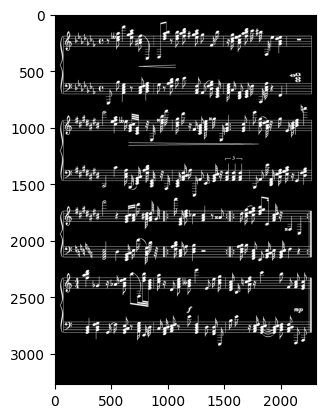

In [22]:
DATASET_PATH = os.path.join("..", "..", "datasets", "generated")
PNG_PATH = os.path.join(DATASET_PATH, "png")
BBOX_PATH = os.path.join(DATASET_PATH, "bbox")

idx = 2
sample_idx = f"{idx:03d}"
x = cv2.imread("../../datasets/generated/png/001/out-0.png")
y = load_mask(PNG_PATH, sample_idx, 48)

def Curvature(amplitude):
    
    def image(img, **kwargs):
        x = np.arange(0, img.shape[1], np.uint8)
        y = np.sin(x)
        
        return 255-img
    
    return A.Lambda(image=image)

transform = A.Compose([
    Curvature(),
])

aug_data = transform(image=x, mask=y)
x, y = aug_data["image"], aug_data["mask"]
plt.imshow(x)

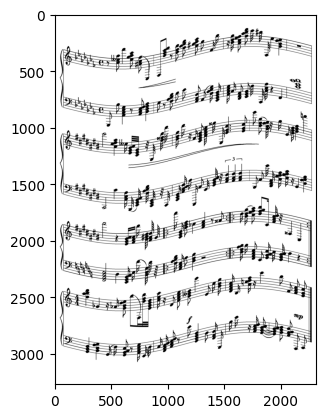

In [57]:
img = cv2.imread("../../datasets/generated/png/001/out-0.png")

amplitude = 100
frequency =  2* np.pi / (img.shape[1])
x = np.arange(0, img.shape[1])
y = (np.sin(x * frequency) + 1) * amplitude
y = y.astype(np.uint16)

res = np.ones_like(img) * 255
for i in range(img.shape[1]):
    neg = img.shape[0] - y[i]
    res[y[i]:, i:i+1] = img[:neg, i:i+1]
plt.imshow(res)

0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.25
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.25
0.0625
0.25
0.0625
0.0625
0.25
0.25
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.25
0.25
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.25
0.0625
0.25
0.25
0.0625
0.25
0.25
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.25
0.25
0.0625
0.25
0.0625
0.0625
0.25
0.0625
0.0625
0.0625
0.0625
0.0625
0.25
0.0625
0.0625
0.25
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.25
0.0625
0.25
0.0625
0.25
0.25
0

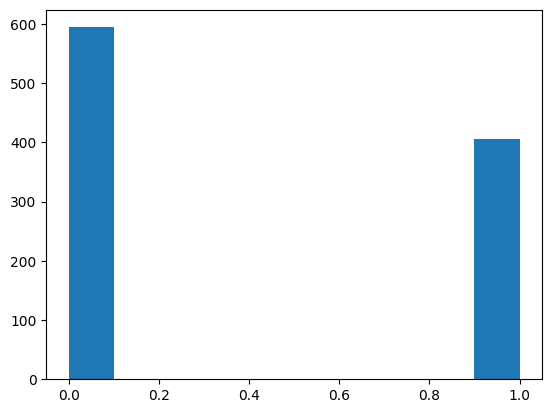

array([0, 1])

In [84]:
import random
import math

def metropolis_hastings(target_distribution, proposal_distribution, initial_state, num_samples):
    """
    Generates samples from a target distribution using the Metropolis-Hastings algorithm.

    Parameters:
    - target_distribution: a function that returns the probability of a state under the target distribution
    - proposal_distribution: a function that returns a proposed state given the current state
    - initial_state: the starting state for the Markov chain
    - num_samples: the number of samples to generate

    Returns:
    - a list of samples from the target distribution
    """
    samples = []
    state = initial_state
    for _ in range(num_samples):
        proposed_state = proposal_distribution(state)
        acceptance_probability = min(1, target_distribution(proposed_state)/target_distribution(state))
        print(target_distribution(proposed_state))
        if random.random() < acceptance_probability:
            state = proposed_state
        samples.append(state)
    return samples

def target_distribution(thickness):
    """
    Returns the probability of a thickness under the target distribution.
    In this case, the target distribution is a symmetric binomial distribution.
    """
    n = 4  # number of trials
    p = 0.5  # probability of success in each trial
    return math.comb(n, thickness) * p**thickness * (1-p)**(n-thickness)

def proposal_distribution(thickness, num_states, P):
    """
    Returns a proposed thickness given the current thickness, the number of states, and the probability matrix.
    """
    # Look up the row of the matrix corresponding to the current thickness
    row = P[thickness]
    # Generate a random number between 0 and 1
    r = random.random()
    # Determine the next thickness based on the probabilities in the row
    for i in range(num_states):
        if r < sum(row[:i+1]):
            return i
    # If the random number is greater than the sum of the probabilities in the row, return the last state
    print("§")
    return num_states - 1

# Define the number of states and the probability matrix
num_states = 4
c = 0.9
d = 1 - c / 2
P = [
    [c, d, 0, 0],
    [d, c, d, 0],
    [0, d, c, d],
    [0, 0, d, c],
]

# Generate 1000 samples from the target distribution using the modified proposal distribution
samples = metropolis_hastings(target_distribution, lambda x: proposal_distribution(x, num_states, P), 0, 1000)

# Plot the histogram of the samples
import matplotlib.pyplot as plt
plt.hist(samples)
plt.show()
np.unique(samples)